This notebook is a general overview of how to load a raw data file, detect spikes, and plot the results.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

from IPython.display import display

### Load raw data

SanPy is built with file loaders for pClamp files (using pyAbf), csv files, and matplab files.

In [2]:
import sanpy

path = '../../data/19114001.abf'
ba = sanpy.bAnalysis(path);

# print info on the file and analysis
print(ba)

WARNING sanpy.fileloaders.fileLoader_base  fileLoader_base.py getFileLoaders() line:54 -- Did not load "epochTable", no "filetype" attribute


fileLoader: file: 19114001.abf sweeps: 1 dur (Sec):60.0 spikes:0


### Plot Raw Data.

Here we are plotting the raw data membrane potential (mV) and the first derivative (dV/dt). The first derivative is critical for accurate spike detection.

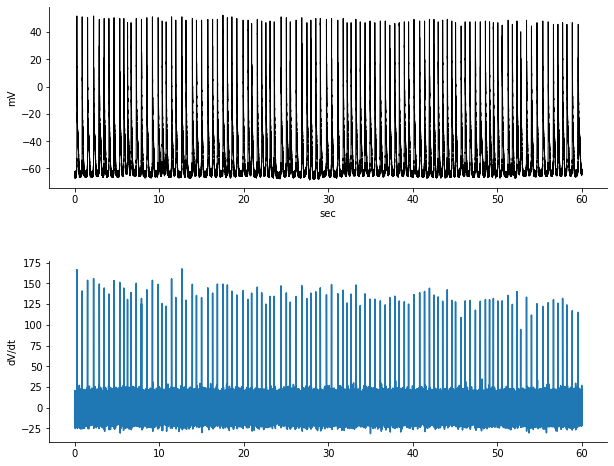

In [3]:
bp = sanpy.analysisPlot.bAnalysisPlot(ba)

bp.plotDerivAndRaw();

## Detect spikes

Spike detection requires a number of [parameters](../methods/#detection-parameters). SanPy provides built in presets for common cell types including ventricular myocytes, slow and fast neurons.

Here, we grab the detection presets for a sino-atrial node cardiac myocyte named 'SA Node' and then detect spikes with `spikeDetect(dDict)`.

`dDict` is a Python dictionary with keys being the detection [parameters](../methods/#detection-parameters) and the value is, well, the value of that parameter key. In this example we set the `dvdtThreshold` to 50, this was arrived at by inspecting our plot of the raw data (above).

In [4]:
dDict = sanpy.bDetection().getDetectionDict('SA Node')

dDict['dvdtThreshold'] = 50

ba.spikeDetect(dDict)
print(ba)

 INFO sanpy.bAnalysis_  bAnalysis_.py getErrorReport() line:2247 -- Generating error report for 103 spikes


fileLoader: file: 19114001.abf sweeps: 1 dur (Sec):60.0 spikes:103


All the named preset detection parameters are available using `getDetectionPresetList()`

In [5]:
print(sanpy.bDetection().getDetectionPresetList())

['SA Node', 'Ventricular', 'Neuron', 'Fast Neuron', 'Sub Threshold', 'Ca Spikes', 'Ca Kymograph']


## Plot results

Once analyzed, the analysis results can be plotted over the raw data. Here we are using `bAnalysisPlot` to make simple plots.

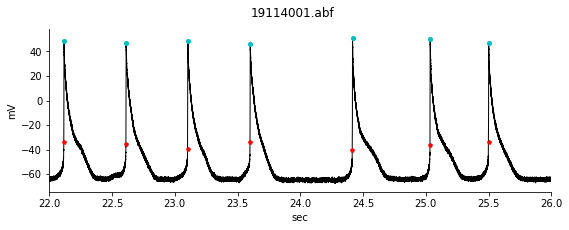

In [6]:
bp = sanpy.bAnalysisPlot(ba)
ax = bp.plotSpikes(plotThreshold=True, plotPeak=True);

# zoom in on x-axis
ax.set_xlim([22,26]);

The [analysis results](../methods/#analysis-results) can easily be pulled from the bAnalysis object and manipulated in any number of ways.

First, as a Pandas DataFrame.

In [7]:
df =ba.asDataFrame()
display(df.head())

,spikeNumber,include,detectionType,sweep,epoch,epochLevel,sweepSpikeNumber,userType,errors,analysisDate,...,cycleLength_pnts,cycleLength_ms,diastolicDuration_ms,widths,widths_10,widths_20,widths_50,widths_80,widths_90,user_timeToPeak_ms
0,0,True,dvdt,0,0,0.0,0,0,[],20230430,...,NaN,NaN,59.30,"[{'halfHeight': 10, 'risingPnt': 5138, 'fallin...",59.05,42.15,16.30,4.00,2.10,1.45
1,1,True,dvdt,0,0,0.0,1,0,[],20230430,...,12284.0,614.20,70.40,"[{'halfHeight': 10, 'risingPnt': 17646, 'falli...",65.65,48.95,18.40,4.15,2.25,1.30
2,2,True,dvdt,0,1,0.0,2,0,[],20230430,...,13023.0,651.15,60.95,"[{'halfHeight': 10, 'risingPnt': 30479, 'falli...",64.30,45.70,14.85,4.00,2.20,1.35
3,3,True,dvdt,0,1,0.0,3,0,[],20230430,...,14660.0,733.00,40.55,"[{'halfHeight': 10, 'risingPnt': 44732, 'falli...",67.45,49.65,18.70,4.30,2.30,1.40
4,4,True,dvdt,0,1,0.0,4,0,[],20230430,...,12455.0,622.75,90.95,"[{'halfHeight': 10, 'risingPnt': 58196, 'falli...",73.95,51.00,18.30,4.80,2.40,1.80


Second, as a numpy array and plotted with matplotlib.

Here we are pulling the time of AP threshold and the instantaneous frequency of all spikes.

See our documentation for all the available [analysis results](../methods/#analysis-results).

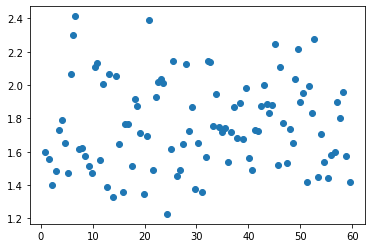

In [8]:
thresholdSec = ba.getStat('thresholdSec')
instFeq = ba.getStat('spikeFreq_hz')

import matplotlib.pyplot as plt
plt.plot(thresholdSec, instFeq, 'o')
plt.show()

Finally, we will manually plot the raw data with an overlay of the spike peak (mV).

The bAnalysis `fileLoader` contains all the raw data for the file including the recording and acquisition parameters such as sampling rate.

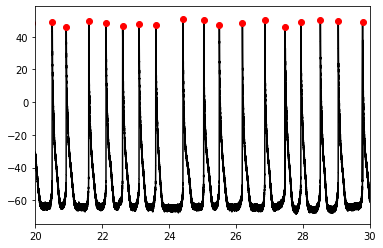

In [9]:
# sweepX is the time of a recording
sweepX = ba.fileLoader.sweepX
# sweepY is the actual recording
sweepY = ba.fileLoader.sweepY

# plot the raw data
fig, ax = plt.subplots(1,1)

ax.plot(sweepX, sweepY, 'k');

# overlay spike peak
thresholdSec = ba.getStat('thresholdSec')
peakVal = ba.getStat('peakVal')
ax.plot(thresholdSec, peakVal, 'or');

# zoom the x-axis
ax.set_xlim([20, 30]);